## Avaliação 4

### Objetivo:
Desenvolver um programa em Python para calcular as frequências naturais de vibração e os modos normais (deslocamentos relativos) de sistemas massa-mola unidimensionais com as massas das pontas presas a paredes por molas, e analisar como variações nas massas e nas constantes de mola influenciam o comportamento do sistema.

### Instruções:

**1. Sistema com duas massas e extremidades fixas:**

* Modele um sistema de duas massas conectadas por uma mola, com as extremidades também ligadas a paredes por molas adicionais.

* Inicialmente, use:

    * Massas iguais: $m_1$ = $m_2$ = $1kg$

    * Constantes de mola iguais: $k = 1\,\text{N/m}$ em todas as molas

* Em seguida, varie $m_2$ mantendo $m_1$ fixo e observe:

    * Mudança nas frequências naturais

    * Alteração dos modos normais (forma dos deslocamentos relativos)
 
**2. Extensão para três massas com extremidades fixas:**

* Modele uma cadeia de três massas ligadas entre si por molas e com molas também conectando a primeira e a última massa a paredes rígidas.

* Estude diferentes distribuições de massa:

    * Todas iguais

    * Apenas uma diferente

    * Todas diferentes

* Analise:

    * Como a variação das massas afeta as frequências

    * Como se modificam os padrões dos modos normais

**3. Variação das constantes de mola:**

* Fixe as massas e varie os valores das constantes de mola, incluindo:

    * Molas entre as massas

    * Molas conectadas às paredes

* Avalie o efeito nas frequências e nos modos normais.

### Visualizações Recomendadas:

* Gráficos das frequências naturais em função da variação de massa ou rigidez

* Gráficos dos modos normais (com amplitude relativa de cada massa)

* Representações animadas ou estáticas dos modos para diferentes configurações

### Entrega Esperada:
 
* Código Python funcional, organizado e comentado

* Gráficos representando:

    * Frequências naturais em função dos parâmetros variáveis

    * Modos normais para diferentes configurações

* Pequeno relatório (até 300 palavras) interpretando os efeitos observados, com base física

=== Sistema com 2 massas ===
Frequências naturais (2 massas iguais): [1.         1.73205081]


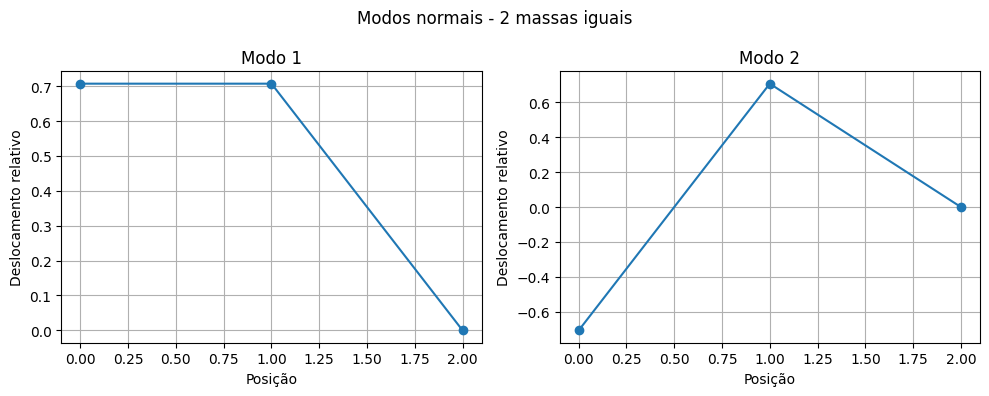


Frequências naturais (m2=0.5kg): [1.1260325  2.17532775]


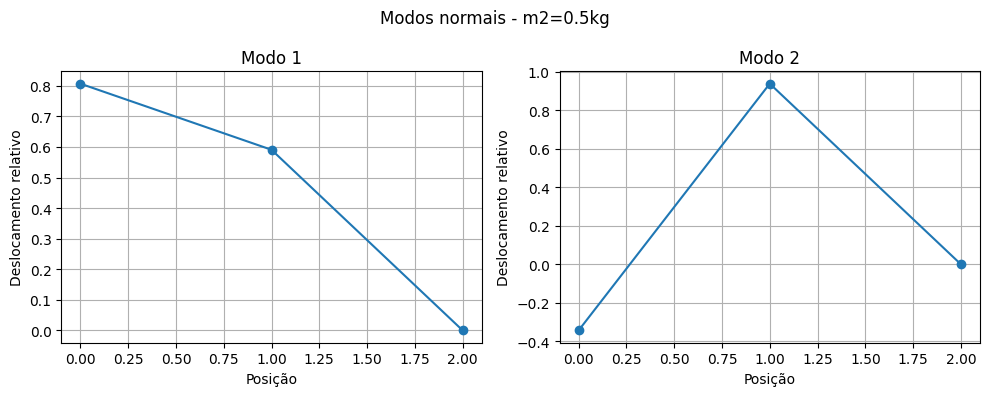


=== Sistema com 3 massas ===
Frequências naturais (3 massas iguais): [0.76536686 1.41421356 1.84775907]


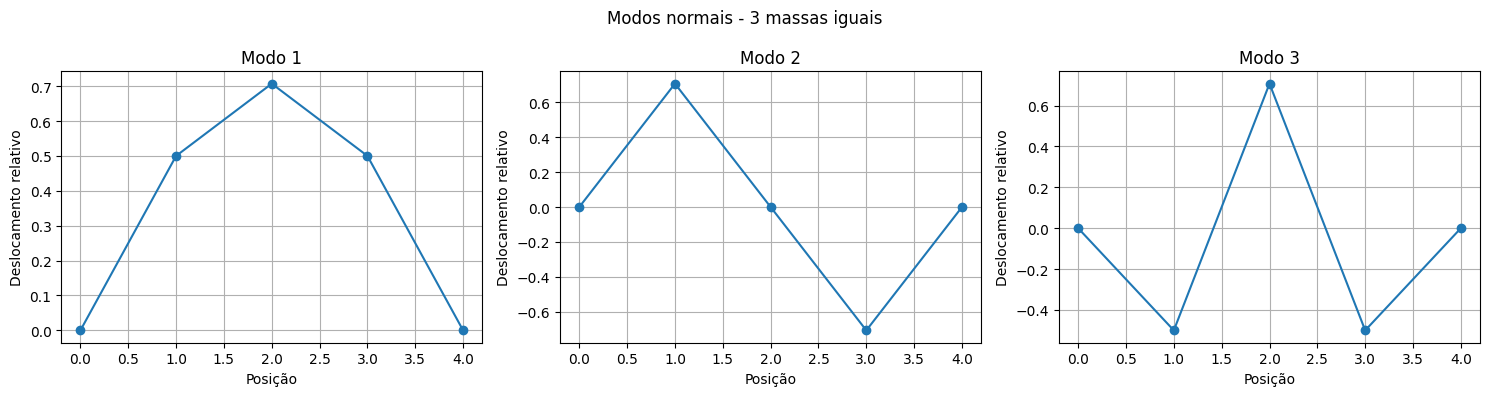


Frequências naturais (m3=2kg): [0.6697854  1.19449456 1.7676454 ]


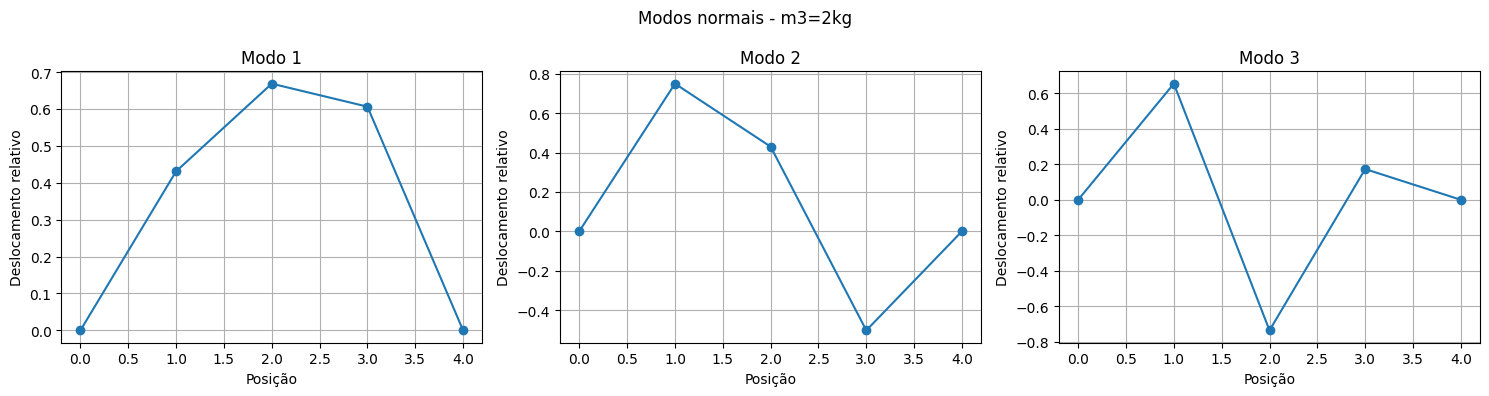


=== Análise de variação de massa ===


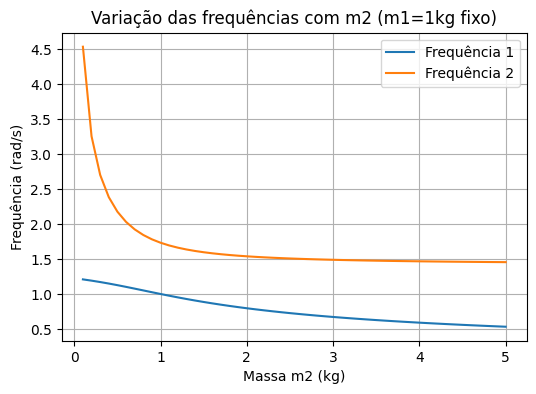

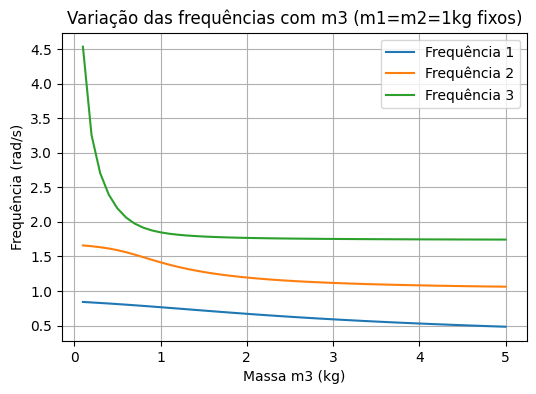


=== Análise de variação de constante de mola ===


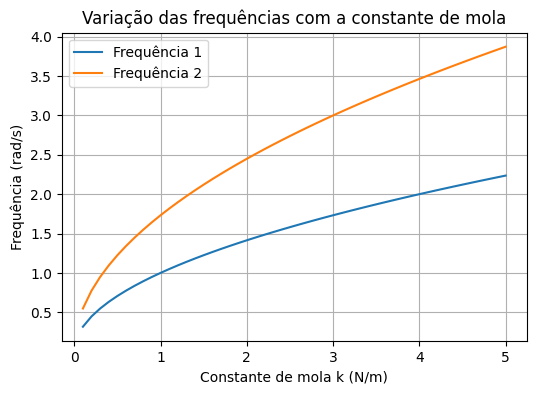

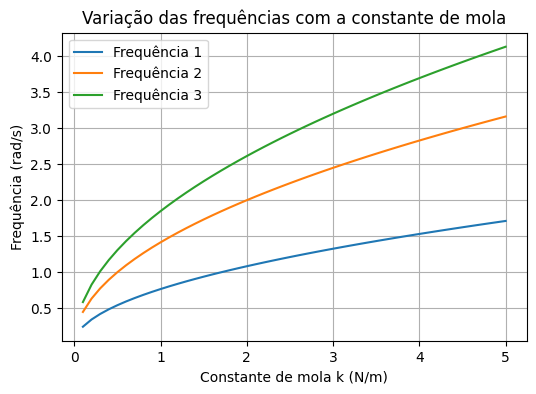

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

def sistema_duas_massas(m1=1, m2=1, k=1):
    # Matriz de massa
    M = np.array([[m1, 0], [0, m2]])
    
    # Matriz de rigidez
    K = np.array([[2*k, -k], [-k, 2*k]])
    
    # Resolver problema de autovalor generalizado
    eigenvalues, eigenvectors = eig(K, M)
    
    # Frequências naturais (em rad/s)
    freqs = np.sqrt(np.real(eigenvalues))
    
    # Ordenar frequências e modos
    idx = freqs.argsort()
    freqs = freqs[idx]
    modes = eigenvectors[:, idx]
    
    return freqs, modes

def plot_modos_duas_massas(modes, title):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    positions = np.array([0, 1, 2])  
    
    for i in range(2):
        displacements = np.array([0, modes[0,i], modes[1,i], 0])
        ax[i].plot(positions, displacements[1:], 'o-') 
        ax[i].set_title(f'Modo {i+1}')
        ax[i].set_xlabel('Posição')
        ax[i].set_ylabel('Deslocamento relativo')
        ax[i].grid(True)
    
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

def sistema_tres_massas(m1=1, m2=1, m3=1, k=1):
    # Matriz de massa
    M = np.diag([m1, m2, m3])
    
    # Matriz de rigidez
    K = np.array([[2*k, -k, 0],
                  [-k, 2*k, -k],
                  [0, -k, 2*k]])
    
    # Resolver problema de autovalor generalizado
    eigenvalues, eigenvectors = eig(K, M)
    
    # Frequências naturais (em rad/s)
    freqs = np.sqrt(np.real(eigenvalues))
    
    # Ordenar frequências e modos
    idx = freqs.argsort()
    freqs = freqs[idx]
    modes = eigenvectors[:, idx]
    
    return freqs, modes

def plot_modos_tres_massas(modes, title):
    fig, ax = plt.subplots(1, 3, figsize=(15, 4))
    positions = np.array([0, 1, 2, 3, 4])  
    
    for i in range(3):
        displacements = np.array([0, modes[0,i], modes[1,i], modes[2,i], 0])
        ax[i].plot(positions, displacements, 'o-')
        ax[i].set_title(f'Modo {i+1}')
        ax[i].set_xlabel('Posição')
        ax[i].set_ylabel('Deslocamento relativo')
        ax[i].grid(True)
    
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

def analisar_variacao_massa(sistema='duas'):
    if sistema == 'duas':
        m1 = 1
        m2_values = np.linspace(0.1, 5, 50)
        freqs_list = []
        
        for m2 in m2_values:
            freqs, _ = sistema_duas_massas(m1, m2)
            freqs_list.append(freqs)
        
        freqs_array = np.array(freqs_list)
        
        plt.figure(figsize=(6, 4))
        for i in range(2):
            plt.plot(m2_values, freqs_array[:, i], label=f'Frequência {i+1}')
        
        plt.xlabel('Massa m2 (kg)')
        plt.ylabel('Frequência (rad/s)')
        plt.title('Variação das frequências com m2 (m1=1kg fixo)')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    elif sistema == 'tres':
        m1 = m2 = 1
        m3_values = np.linspace(0.1, 5, 50)
        freqs_list = []
        
        for m3 in m3_values:
            freqs, _ = sistema_tres_massas(m1, m2, m3)
            freqs_list.append(freqs)
        
        freqs_array = np.array(freqs_list)
        
        plt.figure(figsize=(6, 4))
        for i in range(3):
            plt.plot(m3_values, freqs_array[:, i], label=f'Frequência {i+1}')
        
        plt.xlabel('Massa m3 (kg)')
        plt.ylabel('Frequência (rad/s)')
        plt.title('Variação das frequências com m3 (m1=m2=1kg fixos)')
        plt.legend()
        plt.grid(True)
        plt.show()

def analisar_variacao_mola(sistema='duas'):
    if sistema == 'duas':
        k_values = np.linspace(0.1, 5, 50)
        freqs_list = []
        
        for k in k_values:
            freqs, _ = sistema_duas_massas(k=k)
            freqs_list.append(freqs)
        
        freqs_array = np.array(freqs_list)
        
        plt.figure(figsize=(6, 4))
        for i in range(2):
            plt.plot(k_values, freqs_array[:, i], label=f'Frequência {i+1}')
        
        plt.xlabel('Constante de mola k (N/m)')
        plt.ylabel('Frequência (rad/s)')
        plt.title('Variação das frequências com a constante de mola')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    elif sistema == 'tres':
        k_values = np.linspace(0.1, 5, 50)
        freqs_list = []
        
        for k in k_values:
            freqs, _ = sistema_tres_massas(k=k)
            freqs_list.append(freqs)
        
        freqs_array = np.array(freqs_list)
        
        plt.figure(figsize=(6, 4))
        for i in range(3):
            plt.plot(k_values, freqs_array[:, i], label=f'Frequência {i+1}')
        
        plt.xlabel('Constante de mola k (N/m)')
        plt.ylabel('Frequência (rad/s)')
        plt.title('Variação das frequências com a constante de mola')
        plt.legend()
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    # Sistema com 2 massas - caso base
    print("=== Sistema com 2 massas ===")
    freqs, modes = sistema_duas_massas()
    print("Frequências naturais (2 massas iguais):", freqs)
    plot_modos_duas_massas(modes, "Modos normais - 2 massas iguais")

    # Sistema com 2 massas - m2 diferente
    freqs, modes = sistema_duas_massas(m2=0.5)
    print("\nFrequências naturais (m2=0.5kg):", freqs)
    plot_modos_duas_massas(modes, "Modos normais - m2=0.5kg")

    # Sistema com 3 massas - caso base
    print("\n=== Sistema com 3 massas ===")
    freqs, modes = sistema_tres_massas()
    print("Frequências naturais (3 massas iguais):", freqs)
    plot_modos_tres_massas(modes, "Modos normais - 3 massas iguais")

    # Sistema com 3 massas - m3 diferente
    freqs, modes = sistema_tres_massas(m3=2)
    print("\nFrequências naturais (m3=2kg):", freqs)
    plot_modos_tres_massas(modes, "Modos normais - m3=2kg")

    # Análise de variação de massa
    print("\n=== Análise de variação de massa ===")
    analisar_variacao_massa('duas')
    analisar_variacao_massa('tres')

    # Análise de variação de mola
    print("\n=== Análise de variação de constante de mola ===")
    analisar_variacao_mola('duas')
    analisar_variacao_mola('tres')

A análise dos sistemas massa-mola revelou padrões interessantes relacionados ao comportamento dinâmico desses arranjos. No caso do sistema com duas massas, quando elas são iguais, as frequências naturais obtidas são $\sqrt k/m$ e $\sqrt 3k/m$. Ao diminuir o valor da segunda massa $(m_2)$, observa-se que a frequência mais alta cresce significativamente, enquanto a mais baixa sofre pouca variação. Os modos normais indicam que, com uma massa menor, essa massa tende a vibrar com maior amplitude.

No sistema com três massas iguais, surgem três frequências distintas. Alterar apenas uma das massas, como m₃, afeta mais fortemente os modos que envolvem o movimento dessa massa específica. A menor das frequências — associada a um modo global de oscilação — mostra-se menos sensível a variações individuais de massa.

Quanto ao efeito da constante de mola, todas as frequências aumentam proporcionalmente à raiz quadrada de k $(\sqrt k)$, preservando a razão entre elas. Isso ocorre porque a rigidez da mola determina a força restauradora do sistema.

Os modos normais sempre aparecem em número igual ao de massas presentes no sistema. O modo de menor frequência envolve um movimento coordenado entre as massas, enquanto os modos de frequência mais alta apresentam movimentos opostos entre elas. Quando as massas são desiguais, a simetria dos modos é distorcida.

Esses resultados estão de acordo com a teoria de vibrações em sistemas acoplados, na qual as frequências naturais são determinadas pela razão entre rigidez e inércia $(k/m)$, e os modos normais indicam como a energia vibracional se distribui entre os elementos do sistema. Esse tipo de análise tem aplicações em áreas como engenharia mecânica, física do estado sólido (na modelagem de cristais) e análise estrutural.
